<a href="https://colab.research.google.com/github/anjanpa/CLASSIFICATION-PROJECT-Heart-Disease-Classification/blob/master/Heart_disease_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting our tools ready

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Importing the dataset
data=pd.read_csv("/content/drive/My Drive/heart-disease.csv")

## Exploratory data analysis

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


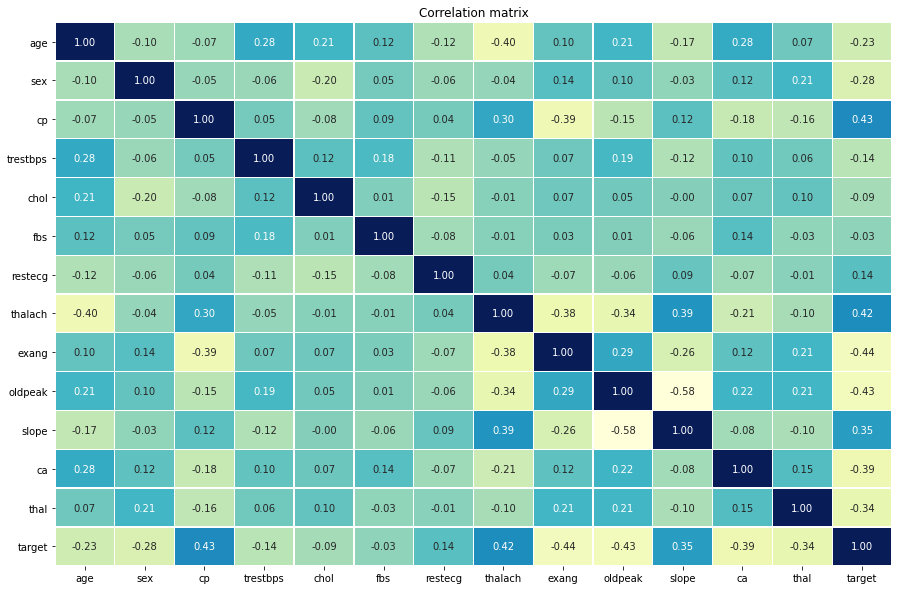

In [11]:
## Finding the correlation using seaborn heatmap
corr=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr,
               annot=True,
               cbar=False,
               cmap="YlGnBu",
               linewidth=0.3,
               fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [14]:
data.isna().sum().sum()

0

## Modelling 

### Using machine learning algorithms from sklearn

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [32]:
models={"RandomForest":RandomForestClassifier(),
        "LogisticRegression":LogisticRegression(),
        "Gradient":GradientBoostingClassifier(),
        "NaiveBayesClassifier":GaussianNB(),
        "LinearSVC":LinearSVC(),
        "DecisionTree":DecisionTreeClassifier(),
        #"AdaBoostClassifier":AdaBoostClassifier(),
        #"Neuralnetwork":MLPClassifier()
        }

In [33]:
## Splitting the data
from sklearn.model_selection import train_test_split
X=data.drop("target",axis=1)
y=data["target"]
X_train,X_valid,y_train,y_valid=train_test_split(X,
                                                 y,
                                                 test_size=0.2)
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((242, 13), (61, 13), (242,), (61,))

In [21]:
from sklearn.metrics import confusion_matrix

In [36]:
result={}
def fit_and_score(models,X_train,y_train,X_valid,y_valid):
  for model_name,model in models.items():
    model.fit(X_train,y_train)
    result[model_name]=model.score(X_valid,y_valid)
  return result

In [37]:
res=fit_and_score(models,X_train,y_train,X_valid,y_valid

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'DecisionTree': 0.6885245901639344,
 'Gradient': 0.7704918032786885,
 'LinearSVC': 0.7377049180327869,
 'LogisticRegression': 0.819672131147541,
 'NaiveBayesClassifier': 0.7868852459016393,
 'RandomForest': 0.7213114754098361}

In [38]:
res

{'DecisionTree': 0.6885245901639344,
 'Gradient': 0.7704918032786885,
 'LinearSVC': 0.7377049180327869,
 'LogisticRegression': 0.819672131147541,
 'NaiveBayesClassifier': 0.7868852459016393,
 'RandomForest': 0.7213114754098361}

### Using neural network

In [39]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [43]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [40]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
## Splitting the data
train,test=train_test_split(data,test_size=0.2)
train,val=train_test_split(train,test_size=0.2)

In [48]:
## Make different columns

## Feature columns
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
  feature_columns.append(feature_column.numeric_column(header))


## # bucketized cols
age = feature_column.numeric_column('age')
age_buckets = feature_column.bucketized_column(age, boundaries=[1, 2, 3, 4, 5])
feature_columns.append(age_buckets)

# indicator_columns
indicator_column_names = ['sex','cp']
for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, data[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)




feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

# Earlier, we used a small batch size to demonstrate how feature columns worked. We create a new input pipeline with a larger batch size.

batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [52]:
### Developing model,compiling it and training it
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=100)

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/7 [===>..........................] - ETA: 0s - loss: 3.7076 - accuracy: 0.3750WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'age': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'sex': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int64>, 'cp': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=int64>, 'trestbps': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int64>, 'chol': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=int64>, 'fbs': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int64>, 'restecg': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int64>, 'thalach': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=int64>, 'exang': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'oldpeak': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>,

# NOTE:
*SO CHECKING THROUGH BOTH OF THESE MODELS, WHAT WE COULD INFER IS THAT,FOR THE PROBLEMS THAT CAN BE SOLVED USING MACHINE LEARNING(ALGORITHMIC BASED),WE SHOULD NOT GO FOR NEURAL NETWORK .AS THE ABOVE MODELS CAN ENSURE THAT SIMPLE MACHINE LEARNING MODELS USED FROM SKLEARN HAD ALMOST SAME ACCURACY METRICS AS NEURAL NETWORK WHICH IS MORE OF A COMPLEX MODEL.*